Name: Shreyas Dongre 
Roll no: I-082          
Stream: AI                           
Semester: V                                           
Batch: I3            
                                                                       Date: 10/9/2022       
Subject: DL
###Experiment-5

In [18]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [19]:
from keras.datasets import imdb

In [20]:
(train_data, train_labels),(test_data,test_labels) = imdb.load_data(num_words=10000)

In [21]:
len(train_data[1])

189

In [22]:
train_data[1]

[1,
 194,
 1153,
 194,
 8255,
 78,
 228,
 5,
 6,
 1463,
 4369,
 5012,
 134,
 26,
 4,
 715,
 8,
 118,
 1634,
 14,
 394,
 20,
 13,
 119,
 954,
 189,
 102,
 5,
 207,
 110,
 3103,
 21,
 14,
 69,
 188,
 8,
 30,
 23,
 7,
 4,
 249,
 126,
 93,
 4,
 114,
 9,
 2300,
 1523,
 5,
 647,
 4,
 116,
 9,
 35,
 8163,
 4,
 229,
 9,
 340,
 1322,
 4,
 118,
 9,
 4,
 130,
 4901,
 19,
 4,
 1002,
 5,
 89,
 29,
 952,
 46,
 37,
 4,
 455,
 9,
 45,
 43,
 38,
 1543,
 1905,
 398,
 4,
 1649,
 26,
 6853,
 5,
 163,
 11,
 3215,
 2,
 4,
 1153,
 9,
 194,
 775,
 7,
 8255,
 2,
 349,
 2637,
 148,
 605,
 2,
 8003,
 15,
 123,
 125,
 68,
 2,
 6853,
 15,
 349,
 165,
 4362,
 98,
 5,
 4,
 228,
 9,
 43,
 2,
 1157,
 15,
 299,
 120,
 5,
 120,
 174,
 11,
 220,
 175,
 136,
 50,
 9,
 4373,
 228,
 8255,
 5,
 2,
 656,
 245,
 2350,
 5,
 4,
 9837,
 131,
 152,
 491,
 18,
 2,
 32,
 7464,
 1212,
 14,
 9,
 6,
 371,
 78,
 22,
 625,
 64,
 1382,
 9,
 8,
 168,
 145,
 23,
 4,
 1690,
 15,
 16,
 4,
 1355,
 5,
 28,
 6,
 52,
 154,
 462,
 33,
 89,
 78,
 2

In [23]:
train_labels[0]

1

In [24]:
train_data.shape

(25000,)

In [25]:
max([max(sequence) for sequence in train_data])

9999

In [26]:
#encoding int sequences into binary matrix
def vectorize_sequences(sequences, dimension=10000):
  results=np.zeros((len(sequences),dimension))
  #creates matrix of sequence x dim
  for i,sequence in enumerate(sequences):      
    results[i,sequence]=1.
  return results  

x_train = vectorize_sequences(train_data)
x_test= vectorize_sequences(test_data)  #vectorized test data  

In [27]:
x_train.shape

(25000, 10000)

In [28]:
x_train[0]

array([0., 1., 1., ..., 0., 0., 0.])

In [29]:
y_train=np.asarray(train_labels).astype('float32')
y_test=np.asarray(test_labels).astype('float32')

In [30]:
y_train[0]

1.0

In [31]:
y_train=np.array(train_labels)

In [32]:
from keras import models
from keras import layers

#defining model
model=models.Sequential()
model.add(layers.Dense(16, activation='relu',input_shape=(10000,)))
model.add(layers.Dense(16,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

In [33]:
#compiling the model 
#model.compile(opti='rmsprop',loss='binary_crossentropy',metrics=['accuracy'])

In [34]:
#configuring opti
#from keras import labels
#from keras import metrics


In [35]:
#settting validation set
x_val=x_train[:10000]
partial_x_train=x_train[10000:]
y_val=y_train[:10000]
partial_y_train=y_train[10000:]

In [36]:
x_val.shape

(10000, 10000)

In [37]:
partial_x_train.shape

(15000, 10000)

In [38]:
#train the model
model.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 4s 95ms/step - loss: 0.5600 - acc: 0.7495 - val_loss: 0.4240 - val_acc: 0.8722
Epoch 2/20
30/30 [==============================] - 1s 48ms/step - loss: 0.3357 - acc: 0.9033 - val_loss: 0.3337 - val_acc: 0.8737
Epoch 3/20
30/30 [==============================] - 1s 43ms/step - loss: 0.2428 - acc: 0.9228 - val_loss: 0.2854 - val_acc: 0.8902
Epoch 4/20
30/30 [==============================] - 1s 44ms/step - loss: 0.1917 - acc: 0.9391 - val_loss: 0.2754 - val_acc: 0.8909
Epoch 5/20
30/30 [==============================] - 2s 52ms/step - loss: 0.1533 - acc: 0.9521 - val_loss: 0.2969 - val_acc: 0.8836
Epoch 6/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1293 - acc: 0.9605 - val_loss: 0.2887 - val_acc: 0.8859
Epoch 7/20
30/30 [==============================] - 2s 53ms/step - loss: 0.1094 - acc: 0.9667 - val_loss: 0.2982 - val_acc: 0.8845
Epoch 8/20
30/30 [==============================] - 1s 45ms/step - loss: 0.0915 - a

In [39]:
history_dict=history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

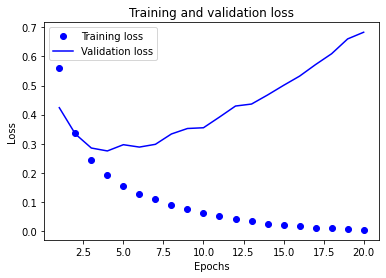

In [40]:
#plotting - training and validation loss
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['acc']
epochs=range(1,len(acc)+1)

plt.plot(epochs, loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

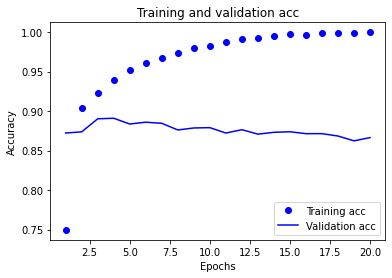

In [41]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [42]:
performance = model.evaluate(x_test,y_test)

782/782 [==============================] - 2s 3ms/step - loss: 0.7638 - acc: 0.8477


In [43]:
model.predict(x_test)

array([[0.00542793],
       [1.        ],
       [0.99097157],
       ...,
       [0.00249773],
       [0.00832304],
       [0.59737813]], dtype=float32)

In [44]:
from keras import regularizers
model_1=models.Sequential()
model_1.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001), activation='relu',input_shape=(10000,)))
model_1.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model_1.add(layers.Dense(1,activation='sigmoid'))

In [45]:
model_1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model_1.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 3s 63ms/step - loss: 0.5397 - acc: 0.7811 - val_loss: 0.4055 - val_acc: 0.8749
Epoch 2/20
30/30 [==============================] - 1s 49ms/step - loss: 0.3365 - acc: 0.9041 - val_loss: 0.3464 - val_acc: 0.8873
Epoch 3/20
30/30 [==============================] - 1s 48ms/step - loss: 0.2672 - acc: 0.9256 - val_loss: 0.3385 - val_acc: 0.8838
Epoch 4/20
30/30 [==============================] - 1s 50ms/step - loss: 0.2354 - acc: 0.9377 - val_loss: 0.3271 - val_acc: 0.8885
Epoch 5/20
30/30 [==============================] - 1s 42ms/step - loss: 0.2135 - acc: 0.9466 - val_loss: 0.3659 - val_acc: 0.8759
Epoch 6/20
30/30 [==============================] - 1s 45ms/step - loss: 0.2041 - acc: 0.9497 - val_loss: 0.3422 - val_acc: 0.8843
Epoch 7/20
30/30 [==============================] - 1s 40ms/step - loss: 0.1894 - acc: 0.9570 - val_loss: 0.3583 - val_acc: 0.8838
Epoch 8/20
30/30 [==============================] - 1s 45ms/step - loss: 0.1775 - a

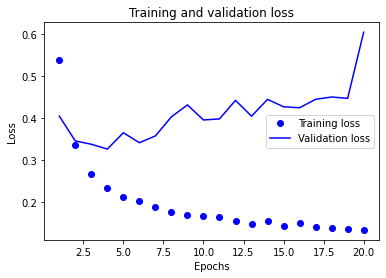

In [46]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['acc']
epochs=range(1,len(acc)+1)

plt.plot(epochs, loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

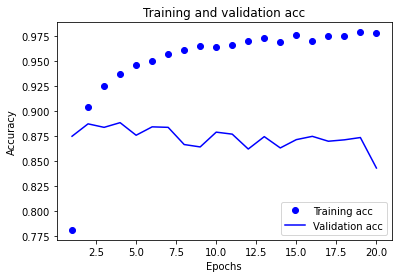

In [47]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [49]:
model_1=models.Sequential()
model_1.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.006), activation='relu',input_shape=(10000,)))
model_1.add(layers.Dense(16,kernel_regularizer=regularizers.l2(0.006), activation='relu'))
model_1.add(layers.Dense(1,activation='sigmoid'))
model_1.compile(optimizer='rmsprop',loss='binary_crossentropy',metrics=['acc'])
history=model_1.fit(partial_x_train,partial_y_train,epochs=20,batch_size=512,validation_data=(x_val,y_val))

Epoch 1/20
30/30 [==============================] - 2s 57ms/step - loss: 0.7186 - acc: 0.7720 - val_loss: 0.5761 - val_acc: 0.8521
Epoch 2/20
30/30 [==============================] - 1s 39ms/step - loss: 0.5140 - acc: 0.8831 - val_loss: 0.5011 - val_acc: 0.8717
Epoch 3/20
30/30 [==============================] - 2s 69ms/step - loss: 0.4498 - acc: 0.8987 - val_loss: 0.4566 - val_acc: 0.8807
Epoch 4/20
30/30 [==============================] - 2s 52ms/step - loss: 0.4149 - acc: 0.9053 - val_loss: 0.4378 - val_acc: 0.8818
Epoch 5/20
30/30 [==============================] - 2s 56ms/step - loss: 0.3855 - acc: 0.9095 - val_loss: 0.4273 - val_acc: 0.8806
Epoch 6/20
30/30 [==============================] - 2s 52ms/step - loss: 0.3706 - acc: 0.9137 - val_loss: 0.4418 - val_acc: 0.8693
Epoch 7/20
30/30 [==============================] - 1s 41ms/step - loss: 0.3578 - acc: 0.9190 - val_loss: 0.4156 - val_acc: 0.8828
Epoch 8/20
30/30 [==============================] - 1s 42ms/step - loss: 0.3478 - a

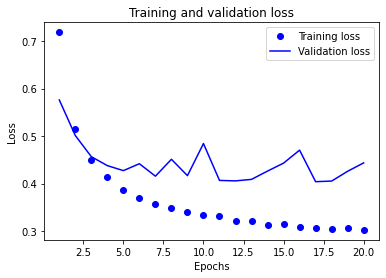

In [50]:
history_dict=history.history
loss_values=history_dict['loss']
val_loss_values = history_dict['val_loss']
acc=history_dict['acc']
epochs=range(1,len(acc)+1)

plt.plot(epochs, loss_values,'bo',label='Training loss')
plt.plot(epochs,val_loss_values,'b',label='Validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

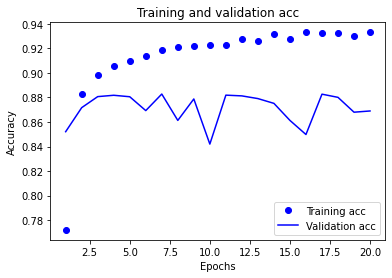

In [51]:
plt.clf()
acc_values = history_dict['acc']
val_acc_values = history_dict['val_acc']
plt.plot(epochs,acc_values,'bo',label='Training acc')
plt.plot(epochs,val_acc_values,'b',label='Validation acc')
plt.title('Training and validation acc')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

#Conclusion:
1) Used regularization technique to reduce the errors by fitting the function appropriately on the given training set and avoid overfitting. 
